In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('wnba.csv')
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [131]:
def exp_lab(row):
    if row['Experience'] == 'R':
        return "Rookie"
    elif int(row['Experience']) >= 1 and int(row['Experience']) <= 3:
        return "Little experience"
    elif int(row['Experience']) >= 4 and int(row['Experience']) < 5:
        return "Experienced"
    elif int(row['Experience']) >= 5 and int(row['Experience']) < 10:
        return "Very experienced"
    else:
        return "Veteran"

In [132]:
df['exp_ordinal'] = df.apply(exp_lab,axis=1)

In [133]:
rookies = df[df['exp_ordinal'] == 'Rookie']
little_xp = df[df['exp_ordinal'] == 'Little experience']
experienced = df[df['exp_ordinal'] == 'Experienced']
very_xp = df[df['exp_ordinal'] == 'Very experienced']
veterans =  df[df['exp_ordinal'] == 'Veteran']

In [134]:
def get_freq(subset):
    return subset['Pos'].value_counts()

In [135]:
rookie_distro = get_freq(rookies)
little_xp_distro = get_freq(little_xp)
experienced_distro = get_freq(experienced)
very_xp_distro = get_freq(very_xp)
veterans_distro = get_freq(veterans)

## Grouped bar plot

Grouped bar plots are ideal for variables measured on nominal and ordinal scales.

In [145]:
df[['Pos','exp_ordinal']].head()

,Pos,exp_ordinal
0,F,Little experience
1,G/F,Veteran
2,G,Experienced
3,G/F,Very experienced
4,G,Rookie


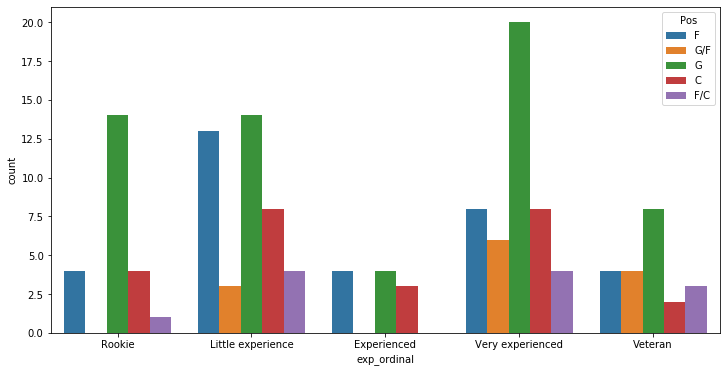

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'exp_ordinal',
              hue = 'Pos',
              order=['Rookie','Little experience','Experienced','Very experienced','Veteran'],
              hue_order=['F','G/F','G','C','F/C'],
              data = df)


In [147]:
def age_ordinal(row):
    if row['Age'] >= 27:
        return 'old'
    else:
        return 'young'

In [148]:
def min_ordinal(row):
    if row['MIN'] >= 497:
        return "average or above"
    else:
        return "below average"

In [117]:
# df['age_ord'] = df['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
# df['MIN_ord'] = df['MIN'].apply(lambda x: 'average or above' if x >= 497 else
#                                          'below average')

In [149]:
df['age_ord'] = df.apply(age_ordinal,axis=1)
df['MIN_ord'] = df.apply(min_ordinal,axis=1)

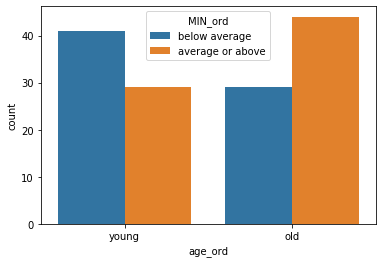

In [150]:
sns.countplot(x='age_ord',
             hue='MIN_ord',
             data=df)

In [157]:
df.groupby(['age_ord','MIN_ord']).size()

age_ord  MIN_ord         
old      average or above    44
         below average       29
young    average or above    29
         below average       41
dtype: int64

## Double Histogram Layers

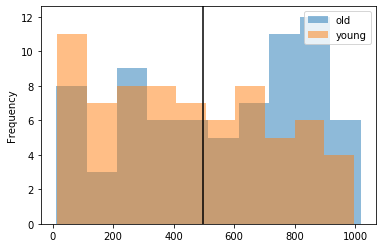

In [176]:
df[df['Age'] >= 27]['MIN'].plot.hist(label='old',
                                     alpha=0.5,
                                    legend=True)
df[df['Age'] < 27]['MIN'].plot.hist(label='young',
                                   alpha=0.5,
                                   legend=True)
plt.axvline(df['MIN'].mean(),color='black')

## Kernal Density Plot

kernel density plots display densities on the y-axis instead of frequencies

The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.

For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

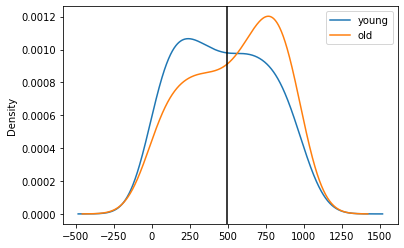

In [182]:
df[df['Age'] <= 27]['MIN'].plot.kde(label='young',legend=True)
df[df['Age'] > 27]['MIN'].plot.kde(label='old',legend=True)
plt.axvline(497,label='Average',color='black')
plt.show()

## Strip Plot

 visualize the distribution

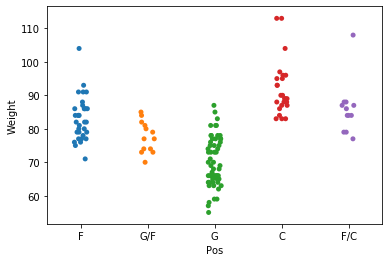

In [185]:
sns.stripplot(x='Pos',y='Weight',data=df,jitter=True)

## Boxplot

IQR = Upper quartile - Lower quartile

A value is an outlier if:

* It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

* It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

In [211]:
df[df['Pos']=='C']['Height'].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

 the upper and lower quartiles, and the interquartile range remain constant. However, the 1.5 factor can vary. If the factor is increased, then the range outside which values are considered outliers increases as well. If the factor is decreased, the range outside which values are considered outlier decreases as well.

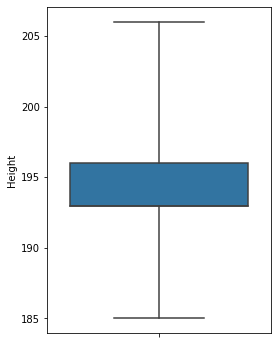

In [223]:
plt.figure(figsize=(4,6))
sns.boxplot(df[df['Pos']=='C']['Height'],
            orient='vertical',
           whis=4)

Every value that is 3 x 1.5  bigger than the upper quartile is considered an outlier , 4.5 , and the upper quartile is 196. 

This means that any value greater than  is considered an outlier

every value that is 3 x 1.5 lower that the lower quartile is an outlier, 4.5 , and the lower quartile is 193. This means that any value less than  is an outlier.

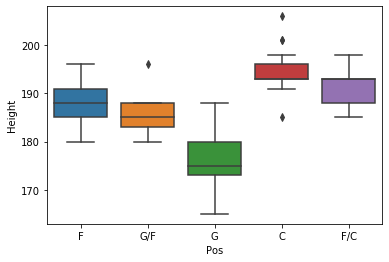

In [188]:
sns.boxplot(x='Pos',y='Height',data=df)

Text(0.5, 0, 'Height')

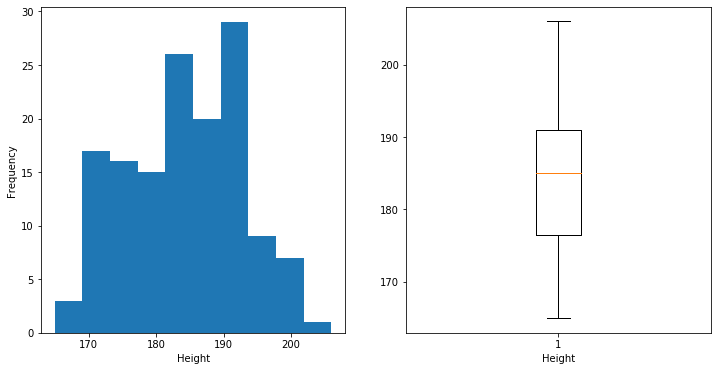

In [206]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Height'].plot.hist()
plt.xlabel('Height')
plt.subplot(1,2,2)
plt.boxplot(df['Height'])
plt.xlabel('Height')

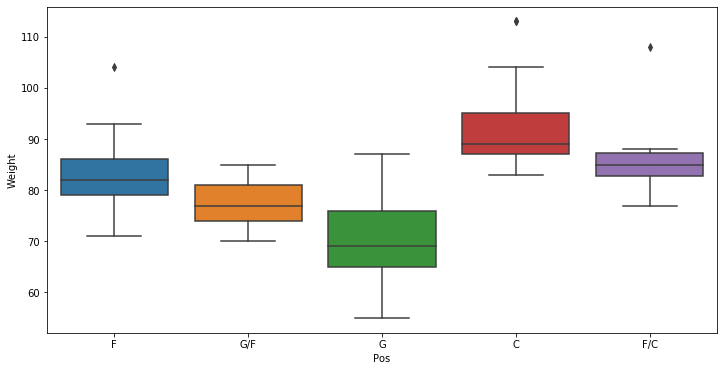

In [209]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pos',y='Weight',data=df)

In [229]:
quartile = df['Games Played'].describe().loc[['25%','75%']].values
IQR = quartile[1] - quartile[0]
IQR

7.0

Text(0.5, 0, 'Games Played')

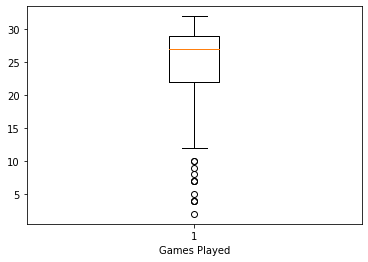

In [238]:
plt.boxplot(df['Games Played'])
plt.xlabel('Games Played')

In [236]:
quartile[1] + 1.5 * IQR # maximum value not outlier

39.5

In [237]:
quartile[0] - 1.5 * IQR # minimum value not outlier

11.5

In [241]:
df[df['Games Played'] > quartile[1] + 1.5 * IQR]['Games Played'].count() # outlier high

0

In [243]:
df[df['Games Played'] < quartile[0] - 1.5 * IQR]['Games Played'].count() # outlier high

12

<img src="./assets/image/s1m5_summary.svg">